# Example of how to use SEDA to model an observed spectrum

Read a near-infrared spectrum from IRTF/SpeX for the T8 brown dwarf 2MASS J04151954-0935066 from Burgasser et al. (2004)

In [2]:
import splat



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [1]:
from astropy.io import fits, ascii
import seda # import the seda package
import importlib # to reload modules
import numpy as np


    SEDA package imported 



In [2]:
# SpeX spectrum
SpeX_name = 'IRTF_SpeX_0415-0935.dat'
SpeX = ascii.read(SpeX_name)
wl_SpeX = SpeX['wl(um)'] # um 
flux_SpeX = SpeX['flux(erg/s/cm2/A)'] # erg/s/cm2/A
eflux_SpeX = SpeX['eflux(erg/s/cm2/A)'] # erg/s/cm2/A

Read SEDA input data

In [3]:
distance = 5.71 # pc (parallax=175.2+-1.7; Dupuy-Liu2012)
edistance = 0.06 # pc

# input spectrum
wl_spectra = wl_SpeX
flux_spectra = flux_SpeX
eflux_spectra = eflux_SpeX
R = 100 # input spectrum resolution to convolve model spectra
lam_R = 2.0 # (um) wavelength reference to get the above resolution for model spectra

my_input_data = seda.InputData(wl_spectra=wl_spectra, flux_spectra=flux_spectra, 
                                     eflux_spectra=eflux_spectra, R=R, lam_R=lam_R, 
                                     distance=distance, edistance=edistance)


Input data loaded successfully


Read model grid options

In [4]:
model = 'Sonora_Elf_Owl'
model_dir = ['/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_575.0_650.0/',
             '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_700.0_800.0/',
            ]

R_range = np.array((0.6, 0.8)) # Rjup
Teff_range = np.array((600, 800))
logg_range = np.array((4.0, 5.0))

my_grid = seda.ModelOptions(model=model, model_dir=model_dir, 
                            logg_range=logg_range, Teff_range=Teff_range, 
                            R_range=R_range)


Model grid options loaded successfully


Read chi2 fit options

In [10]:
my_chi2 = seda.Chi2FitOptions(my_input_data=my_input_data, my_grid=my_grid)


Chi2 fit options loaded successfully


Run chi2 fitting

In [9]:
# importlib.reload(seda.seda_chi2) # to reload the module
# importlib.reload(seda) # to reload the package with the updated module

out_chi2_fit = seda.chi2_fit(my_input_data=my_input_data, my_grid=my_grid, my_chi2=my_chi2)


Running chi2 fitting...
TEST
   2 model spectra will be compared

   2 model spectra to be convolved
      convolution 1/2
      elapsed time convolving this spectrum: 0.0 s
      convolution 2/2

   minimizing chi2...

SEDA ran SUCCESSFULLY
   elapsed time running SEDA: 0.0 s


Plots results

SED with the best fits

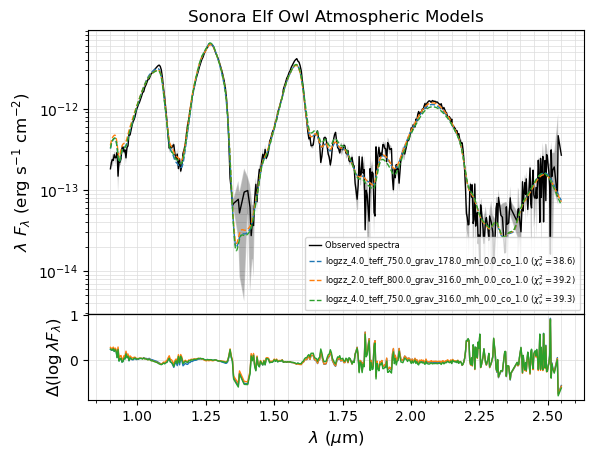

In [11]:
# importlib.reload(seda.seda_plots) # to reload the module
# importlib.reload(seda) # to reload the package with the updated module

seda.plot_chi2_fit(pickle_file='Sonora_Elf_Owl_chi2_minimization.pickle', N_best_fits=3)

Chi2 reduces against wavelength

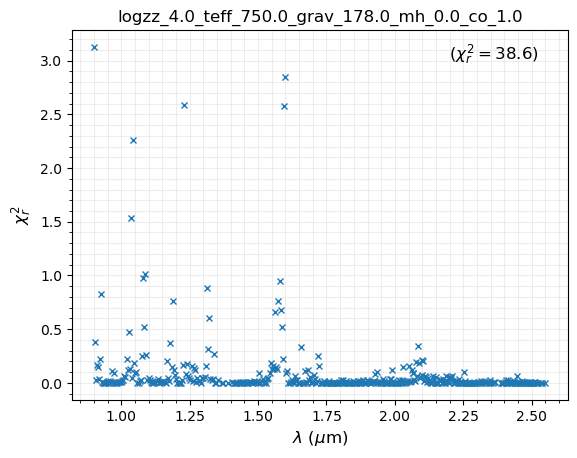

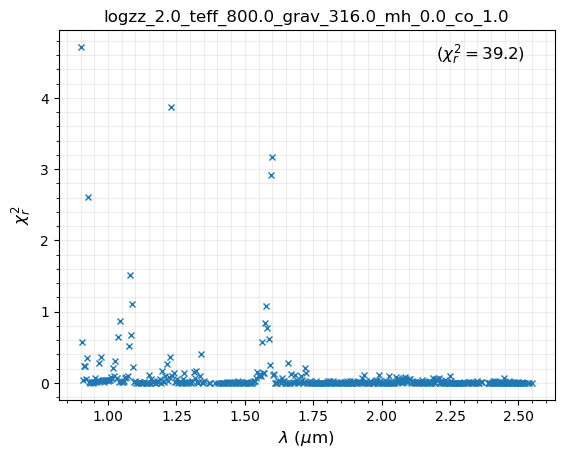

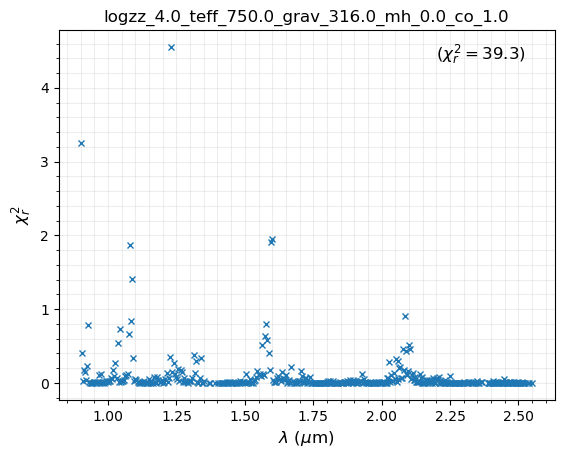

In [12]:
seda.plot_chi2_red(pickle_file='Sonora_Elf_Owl_chi2_minimization.pickle', N_best_fits=3)

In [ ]:
# import input_params as input_params
# importlib.reload(input_params) # to automatically reload any changes in the function

# out_input_params = input_params.input_params(model=model, logg_range=logg_range, 
#                      Teff_range=Teff_range, R_range=R_range, wl_spectra=wl_spectrum, 
#                      flux_spectra=flux_spectrum, eflux_spectra=eflux_spectrum, R=R, lam_R=lam_R, 
#                      distance=distance, edistance=edistance, posteriors='no', dynamic_sampling='no',
#                      save_results='no')

In [ ]:
# # minimize chi2
# import seda as seda
# import importlib

# importlib.reload(seda) # to automatically reload any changes in the function
# out_chi2 = seda.seda(out_input_params)

In [ ]:
# run SEDA
import chi2 as chi2
import importlib

importlib.reload(chi2) # to automatically reload any changes in the function
out_chi2 = chi2.chi2(model=model, logg_range=logg_range, 
                     Teff_range=Teff_range, R_range=R_range, wl_spectra=wl_spectrum, 
                     flux_spectra=flux_spectrum, eflux_spectra=eflux_spectrum, R=R, lam_R=lam_R, 
                     distance=distance, edistance=edistance, posteriors='no', dynamic_sampling='no',
                     save_results='yes')

In [ ]:
import pickle

# open the file in binary mode
# name = f'dynamic_nested_Sonora_Elf_Owl.pickle'
name = f'{model}_chi2_minimization.pickle'
with open(name, 'rb') as file:
    # deserialize and retrieve the variable from the file
    out_chi2 = pickle.load(file)

print('variable loaded successfully')

SAMPLING

In [ ]:
# read grid first
import interpol_model as interpol_model

grid = interpol_model.read_grid(model=model, Teff_range=Teff_range, logg_range=logg_range)

In [ ]:
import sampling as sampling
import importlib

importlib.reload(sampling) # to automatically reload any changes in the function
# kk = sampling.param_ranges(model=model)
our_sampling = sampling.sampling(grid=grid, wl_spectra=wl_SpeX, flux_spectra=flux_SpeX, eflux_spectra=eflux_SpeX, 
                                 Teff_range=Teff_range, logg_range=logg_range, R_range=R_range, model=model, 
                                 distance=distance, dynamic=False)
# our_sampling = sampling.sampling(out_chi2=out_chi2, dynamic=False)

In [ ]:
import pickle

# load saved variable with model grid
# sresults = None

# open the file in binary mode
with open('Sonora_Elf_Owl_static_nested.pickle', 'rb') as file:
    # deserialize and retrieve the variable from the file
    sresults = pickle.load(file)

print('variable loaded successfully')

In [ ]:
from dynesty import plotting as dyplot
from matplotlib import pyplot as plt

# truths = ['1.1', '790', '4.5', '2']
labels = ['R (Rj)', 'Teff (K)', 'logg', 'logKzz', 'Z', 'C/O']
fig, axes = dyplot.cornerplot(sresults, show_titles=True, #truths=truths, 
                              verbose='true', title_fmt='.3f', #, #.1f, .2f, .1f',
                              title_kwargs={'y': 1.0}, labels=labels)
#                               fig=plt.subplots(ndim, ndim, figsize=(7, 7)))

In [ ]:
# plot static run with fixed number of live points
fig, axes = dyplot.runplot(sresults, color='black', mark_final_live=False, logplot=True)

# Sampling posterior using dynamic nestled sampling

Without radius as free parameter

In [ ]:
import sampling as sampling
import importlib

importlib.reload(sampling) # to automatically reload any changes in the function
our_sampling = sampling.sampling(out_chi2=out_chi2, dynamic_sampling='yes', distance_label='no')

In [ ]:
import pickle

# load saved variable with model grid
# sresults = None

# open the file in binary mode
with open('Sonora_Elf_Owl_dynamic_nested.pickle', 'rb') as file:
    # deserialize and retrieve the variable from the file
    dresults = pickle.load(file)

print('variable loaded successfully')

In [ ]:
from dynesty import plotting as dyplot
from matplotlib import pyplot as plt

# truths = ['1.1', '790', '4.5', '2']
labels = ['Teff (K)', 'logg', 'logKzz', 'Z', 'C/O']
fig, axes = dyplot.cornerplot(dresults, show_titles=True, #truths=truths, 
                              verbose='true', title_fmt='.3f', #, #.1f, .2f, .1f',
                              title_kwargs={'y': 1.0}, labels=labels)
#                               fig=plt.subplots(ndim, ndim, figsize=(7, 7)))

With radius as free parameter (it took just 17 min compared to the 1.5 h when radius is not constrained)

In [ ]:
import sampling as sampling
import importlib

importlib.reload(sampling) # to automatically reload any changes in the function
our_sampling = sampling.sampling(out_chi2=out_chi2, dynamic_sampling='yes', distance_label='no')

In [ ]:
import pickle

# load saved variable with model grid
# sresults = None

# open the file in binary mode
with open('Sonora_Elf_Owl_dynamic_nested.pickle', 'rb') as file:
    # deserialize and retrieve the variable from the file
    dresults = pickle.load(file)

print('variable loaded successfully')

In [ ]:
from dynesty import plotting as dyplot
from matplotlib import pyplot as plt

# truths = ['1.1', '790', '4.5', '2']
labels = ['R (Rj)', 'Teff (K)', 'logg', 'logKzz', 'Z', 'C/O']
fig, axes = dyplot.cornerplot(dresults, show_titles=True, #truths=truths, 
                              verbose='true', title_fmt='.3f', #, #.1f, .2f, .1f',
                              title_kwargs={'y': 1.0}, labels=labels)
#                               fig=plt.subplots(ndim, ndim, figsize=(7, 7)))